## **Prediction of Depression**


**Section - 1 (Group - 2)**


1. Suresh Boddu - 0754440
2. Prashanth Ellandula - 0768999
3. Nagarjuna Reddy Naran - 0768786
4. Rajesh Pabba - 0768784



**Import Libraries**

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
! pip install -q kaggle

In [3]:
# Download kaggle.json from Kaggle (API Token) and upload here
from google.colab import files
files.upload() 

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [ ]:
import os
cwd = os.getcwd()
cwd

In [ ]:
# Download data set from kaggle (Using Copy API command)
!kaggle datasets download -d kimjihyundev/b-depressedcsv

In [ ]:
!ls

In [ ]:
#unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zip
!unzip \*.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [155]:
def Data_Details(df):                                              # User defined function used to show some details of data 

    with pd.option_context("display.max_colwidth", 20):              # Limiting the column width for display
        info = pd.DataFrame()                                        # Creating a dataframe named info
        info['data type'] = df.dtypes                                # Adding column data type which has the datatypes of features
        info['percent missing'] = df.isnull().sum()*100/len(df)      # Adding column percent missing which has the percentage of missing data
        info['No. unique'] = df.apply(lambda x: len(x.unique()))     # Adding column No. unique which gives the number of unique values of features
        info['unique values'] = df.apply(lambda x: x.unique())       # Adding column unique values which has the unique values of features
        info['Minimum value'] = df.apply(lambda x: x.min())          # Adding column Minimum value which has the minimum value of features
        info['Maximum value'] = df.apply(lambda x: x.max())          # Adding column Maximum value which has the maximum value of features
        return info.sort_values('data type')                         # Soring values wrt to datatype

**Import Dataset**

In [154]:

dep_df = pd.read_csv('b_depressed.csv')
dep_df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


### Data Dictionary   
Survey_id - Id of each record in the dataset</br>  
Ville_id - Area id of patient</br>   
sex - Sex of the patient</br>   
Age - Age of the patient</br>     
Married- Marrital status of the patient </br>  
Number_children - No. of children of the patient</br>   
education_level - Education level (from 1-18)</br>   
total_members - Toal members of house of the patient</br>   
gained_asset - Earned assets by the patient</br>   
durable_asset - Duable assets of the patien  </br>   
save_asset - Saving of the patient</br>   
living_expenses - Living expenses of the family</br>   
other_expenses - Other expense of the family</br>   
incoming_salary - Income is from the salary or not</br>   
incoming_own_farm - Income is from the farm  or not</br>   
incoming_business - Income is from the business or not</br>   
incoming_no_business -  Income is from the business or not  </br>   
incoming_agricultural - Agricultural income</br>   
farm_expenses - Expenses from the farming</br>   
lasting_investment - Investment amount </br>   
depressed - Depressed state</br>   

In [58]:
dep_df.shape

(1429, 23)

# Exploratory Data Analysis

In [156]:
Data_Details(dep_df)

,data type,percent missing,No. unique,unique values,Minimum value,Maximum value
Survey_id,int64,0.00000,1429,"[926, 747, 1190, 1065, 806, 483, 849, 1386, 93...",1.0,1429.0
lasting_investment,int64,0.00000,982,"[28411718, 7781123, 20100562, 4442561, 2256228...",74292.0,99446667.0
labor_primary,int64,0.00000,2,"[0, 1]",0.0,1.0
farm_expenses,int64,0.00000,694,"[31363432, 18751329, 20731006, 18907036, 22243...",271505.0,99651194.0
incoming_agricultural,int64,0.00000,330,"[30028818, 22288055, 53384566, 22688441, 26692...",325112.0,99789095.0
incoming_no_business,int64,0.00000,2,"[0, 1]",0.0,1.0
incoming_business,int64,0.00000,2,"[0, 1]",0.0,1.0
incoming_own_farm,int64,0.00000,2,"[0, 1]",0.0,1.0
incoming_salary,int64,0.00000,2,"[0, 1]",0.0,1.0
other_expenses,int64,0.00000,615,"[28203066, 44042267, 74503502, 11531066, 10890...",172966.0,99823799.0


From the above information,

1.Observed that there are null values in the "no_lasting_investmen" column of data. </br>
2.Data has integer and float datatypes only. </br>
3.There are 9 categorical values in the data.


In [60]:
type(dep_df)

pandas.core.frame.DataFrame

In [61]:
# Get central tendency of the dataset
dep_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survey_id,1429.0,7.150000e+02,4.126611e+02,1.0,358.0,715.0,1072.0,1429.0
Ville_id,1429.0,7.628621e+01,6.644401e+01,1.0,24.0,57.0,105.0,292.0
sex,1429.0,9.181246e-01,2.742708e-01,0.0,1.0,1.0,1.0,1.0
Age,1429.0,3.477747e+01,1.398622e+01,17.0,25.0,30.0,42.0,91.0
Married,1429.0,7.725682e-01,4.193204e-01,0.0,1.0,1.0,1.0,1.0
Number_children,1429.0,2.883135e+00,1.874472e+00,0.0,2.0,3.0,4.0,11.0
education_level,1429.0,8.687194e+00,2.923532e+00,1.0,8.0,9.0,10.0,19.0
total_members,1429.0,4.969209e+00,1.786317e+00,1.0,4.0,5.0,6.0,12.0
gained_asset,1429.0,3.363448e+07,2.003854e+07,325112.0,23269824.0,28912201.0,37172832.0,99127548.0
durable_asset,1429.0,2.717296e+07,1.815672e+07,162556.0,19298521.0,22861940.0,26569498.0,99615601.0


In [62]:
# Get unique values of the target feature (i.e. 'depressed')
dep_df.depressed.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Depression Rate')

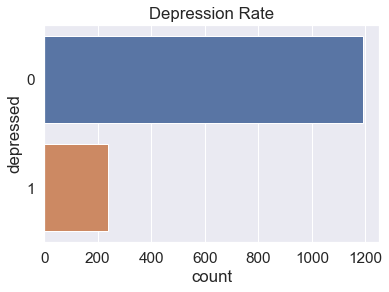

In [63]:
#Count of target feature unique values
dep_df['depressed'].value_counts().head()
sns.countplot(data=dep_df, y='depressed')
plt.title('Depression Rate')

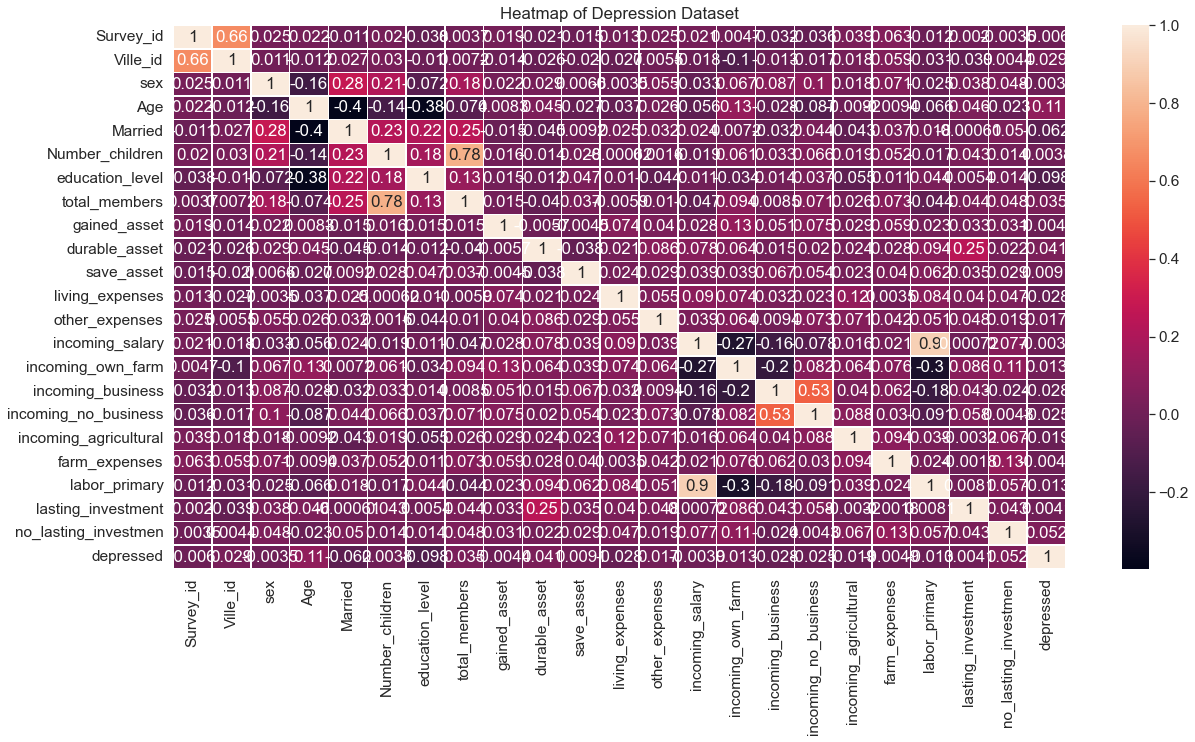

In [64]:
#find the correlation between the features 
corr_matrix = dep_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5)
plt.title('Heatmap of Depression Dataset')
plt.show()

In [65]:
#set target feature threshold value to 0.02 to retrieve highly correlated features with respect to target feature 
dep_corr = corr_matrix['depressed'].sort_values(ascending = False)
filtered_dep  = dep_corr[dep_corr > 0.02]
filtered_dep

depressed               1.000000
Age                     0.105721
no_lasting_investmen    0.051973
durable_asset           0.040505
total_members           0.035056
Ville_id                0.028954
Name: depressed, dtype: float64

([<matplotlib.axis.XTick at 0x14811b98b80>,
 [Text(0, 0, 'Not depressed'), Text(1, 0, 'Depressed')])

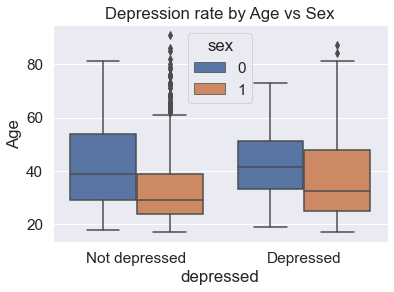

In [66]:
sns.boxplot(data=dep_df,x='depressed',y='Age',hue='sex',)
plt.title('Depression rate by Age vs Sex')
plt.xticks([0, 1], ['Not depressed', 'Depressed'])

Text(0.5, 0.98, 'Age vs Durable Asset')

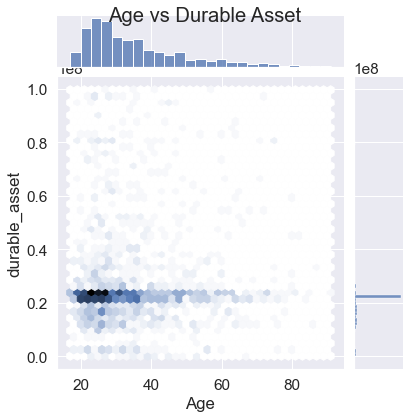

In [67]:
p = sns.jointplot(x='Age',y='durable_asset',data=dep_df,kind='hex')
p.fig.suptitle("Age vs Durable Asset")

Text(0.5, 1.0, 'Depression rate by Education level')

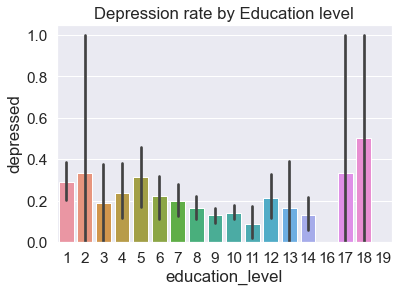

In [68]:
sns.barplot(data=dep_df, x='education_level', y='depressed')
plt.title('Depression rate by Education level')

Text(0.5, 1.0, 'Depression rate by Marriage')

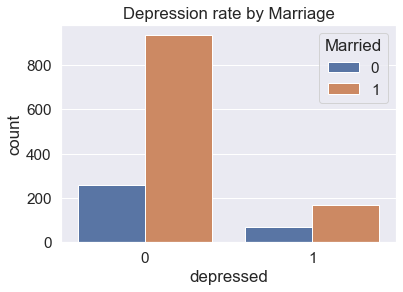

In [69]:
sns.countplot(data=dep_df, x='depressed',hue='Married')
plt.title('Depression rate by Marriage')

Text(0.5, 1.0, 'Depression rate by Incoming business')

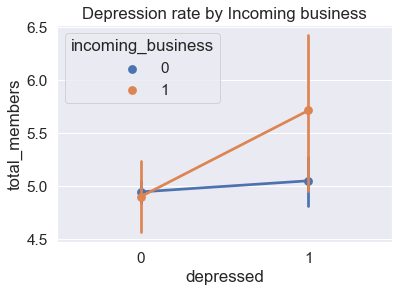

In [70]:
sns.pointplot(data=dep_df, x='depressed', y= 'total_members',hue='incoming_business')
plt.title('Depression rate by Incoming business')

# Initial Data Cleaning

In [71]:
dep_df['no_lasting_investmen'].fillna(0,inplace=True)        #Handling the missing values

In [72]:
dep_df = dep_df.drop(['Survey_id'], axis= 1)

In [73]:
Data_Details(dep_df)

,data type,percent missing,No. unique,unique values,Minimum value,Maximum value
Ville_id,int64,0.0,255,"[91, 57, 115, 97, 42, 25, 130, 72, 195, 33, 52...",1.0,292.0
lasting_investment,int64,0.0,982,"[28411718, 7781123, 20100562, 4442561, 2256228...",74292.0,99446667.0
labor_primary,int64,0.0,2,"[0, 1]",0.0,1.0
farm_expenses,int64,0.0,694,"[31363432, 18751329, 20731006, 18907036, 22243...",271505.0,99651194.0
incoming_agricultural,int64,0.0,330,"[30028818, 22288055, 53384566, 22688441, 26692...",325112.0,99789095.0
incoming_no_business,int64,0.0,2,"[0, 1]",0.0,1.0
incoming_business,int64,0.0,2,"[0, 1]",0.0,1.0
incoming_own_farm,int64,0.0,2,"[0, 1]",0.0,1.0
incoming_salary,int64,0.0,2,"[0, 1]",0.0,1.0
other_expenses,int64,0.0,615,"[28203066, 44042267, 74503502, 11531066, 10890...",172966.0,99823799.0


Missing data is handled. Now, there are no missing values in our data.

# Base Model 

In [74]:
X = dep_df.drop(['depressed'], axis= 1)
Y = dep_df['depressed']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 151)

In [76]:
print(X_train.shape)
print(X_test.shape)

(1143, 21)
(286, 21)


In [77]:
print(Y_train.shape)
print(Y_test.shape)

(1143,)
(286,)


In [78]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [79]:
X_test[0:2]

array([[0.29757785, 1.        , 0.265625  , 1.        , 0.27272727,
        0.47058824, 0.36363636, 0.29834758, 0.23122098, 0.23069408,
        0.27579628, 0.29222599, 0.        , 0.        , 0.        ,
        0.        , 0.29664024, 0.31245309, 0.        , 0.28658205,
        0.28391739],
       [0.59515571, 1.        , 0.046875  , 1.        , 0.27272727,
        0.47058824, 0.54545455, 0.05624211, 0.01906246, 0.32203387,
        0.18527081, 0.74120077, 0.        , 1.        , 0.        ,
        1.        , 0.59027582, 0.70213766, 0.        , 0.29518071,
        0.46372765]])

In [80]:
np.any(np.isnan(dep_df))

False

In [81]:
np.all(np.isfinite(dep_df))

True

### Definitions

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

def conf_matrix_plot(cm):
  df_cm = pd.DataFrame(cm, range(2),range(2))
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})


In [88]:
from rfpimp import * 

def showimp(rf, X, y):                                                                         # Function used to show the feature importances
    features = list(X.columns)                                                                 # Takes the list of all columns into the features
    I = importances(rf, X, y, features=features)                                               # Function that is used to show the importances of the features
    print(I)
    plot_importances(I, color='#4575b4')                                                       # Plots the feature importances

In [89]:
def print_model_output(model,X_train,Y_train,X_test,Y_test):
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  print("Predicted Values : ")  
  print(y_pred)
  print("--------------------------------------------")
  print("Confusion Matrix : ")
  cm = confusion_matrix(Y_test,y_pred)
  print(cm)
  conf_matrix_plot(cm) 
  print("Classification Report : ")
  print("--------------------------------------------")
  print(classification_report(Y_test,y_pred))
  print("--------------------------------------------")
  print("Confusion Matrix plot: ")
#   accuracy = accuracy_score(Y_test,y_pred)                                 # Accuracy of the model
#   print("--------------------------------------------")
#   print(" Feature Importances")
#   showimp(model, X, Y)   


### Model built using Logistic Regression

Predicted Values : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
--------------------------------------------
Confusion Matrix : 
[[242   0]
 [ 44   0]]
Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       242
           1       0.00      0.00      0.00        44

    accuracy                           0.85       286
   macro avg       0.42

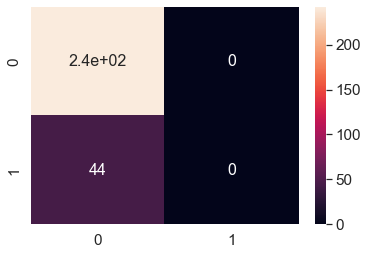

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_test,y_pred))
print("--------------------------------------------")
LR_acc = accuracy_score(Y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot: ")

Predicted Values : 
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0]
--------------------------------------------
Confusion Matrix : 
[[228  14]
 [ 39   5]]
Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       242
           1       0.26      0.11      0.16        44

    accuracy                           0.81       286
   macro avg       0.56

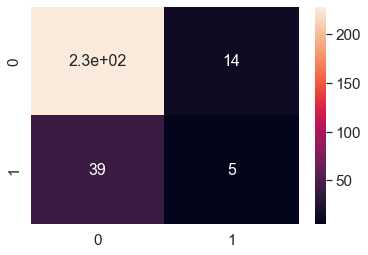

In [92]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train,Y_train)
y_pred = svm_classifier.predict(X_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_test,y_pred))
print("--------------------------------------------")
SVC_acc = accuracy_score(Y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot: ")

Predicted Values : 
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
--------------------------------------------
Confusion Matrix : 
[[213  29]
 [ 38   6]]
Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       242
           1       0.17      0.14      0.15        44

    accuracy                           0.77       286
   macro avg       0.51

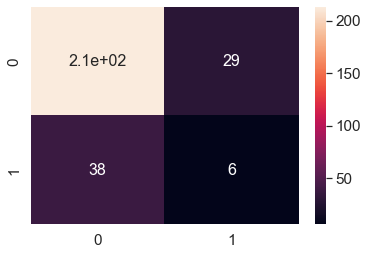

In [141]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state = 151,max_depth=15)
tree_classifier

tree_classifier.fit(X_train,Y_train)

y_pred = tree_classifier.predict(X_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_test,y_pred))
print("--------------------------------------------")
DTC_acc = accuracy_score(Y_test,y_pred)                                 # Accuracy of the model 
print("Confusion Matrix plot: ")

Predicted Values : 
[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
--------------------------------------------
Confusion Matrix : 
[[225  17]
 [ 41   3]]
Classification Report : 
--------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       242
           1       0.15      0.07      0.09        44

    accuracy                           0.80       286
   macro avg       0.50

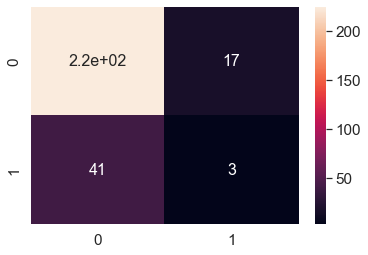

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=151,n_estimators=5)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_test,y_pred))
print("--------------------------------------------")
RFC_acc = accuracy_score(Y_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot: ")

### Model & Accuracy

In [44]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'SVC','Decision Tree Classifier', 'Random Forest Classifier'],'Accuracy' : [LR_acc,SVC_acc,DTC_acc,RFC_acc]})
models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
0,Logistic Regression,0.846154
1,SVC,0.814685
3,Random Forest Classifier,0.797203
2,Decision Tree Classifier,0.765734


## Building the Final Model

In [45]:
dep_df.columns

Index(['Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [46]:
# Adding synthetic data to the actual data.

def Add_Synthetic_Data(dep_df):
 import random
 for i in range(700):
  arr = []
  for col in dep_df.columns:
   arr.append(random.randint(min(dep_df[col]), max(dep_df[col])))
   dep_df.loc[len(dep_df)] = arr
 # print(arr)
 dep_df.sample(frac=1).to_csv('new_depressed.csv', sep=',')

In [47]:
# Add_Synthetic_Data(dep_df)    # Adding synthetic data

### Advanced Data Cleaning

In [101]:
new_df = pd.read_csv('new_depressed.csv')
new_df_backup = new_df.copy()
new_df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447,0


In [102]:
Data_Details(new_df)

,data type,percent missing,No. unique,unique values,Minimum value,Maximum value
Survey_id,int64,0.0,1429,"[926, 747, 1190, 1065, 806, 483, 849, 1386, 93...",1,1429
lasting_investment,int64,0.0,1682,"[28411718, 7781123, 20100562, 4442561, 2256228...",74292,99446667
labor_primary,int64,0.0,2,"[0, 1]",0,1
farm_expenses,int64,0.0,1394,"[31363432, 18751329, 20731006, 18907036, 22243...",271505,99651194
incoming_agricultural,int64,0.0,1030,"[30028818, 22288055, 53384566, 22688441, 26692...",325112,99789095
incoming_no_business,int64,0.0,2,"[0, 1]",0,1
incoming_business,int64,0.0,2,"[0, 1]",0,1
incoming_own_farm,int64,0.0,2,"[0, 1]",0,1
incoming_salary,int64,0.0,2,"[0, 1]",0,1
other_expenses,int64,0.0,1315,"[28203066, 44042267, 74503502, 11531066, 10890...",172966,99823799


In [103]:
# Cleaning

new_df = new_df.drop(new_df[(dep_df['Age'] <= 20) & (new_df['Number_children'] > 5)].index)
new_df = new_df.drop(new_df[(dep_df['Age'] <= 20) & (new_df['education_level'] > 15)].index)

In [104]:
#Feature Engineering

new_df['Total_Investments'] = new_df.lasting_investment+new_df.no_lasting_investmen
new_df['Total_Expenses'] = new_df.farm_expenses + new_df.other_expenses + new_df.living_expenses
new_df['Total_Assets'] = new_df.durable_asset + new_df.gained_asset

In [105]:
new_df['Total_Savings'] = new_df['Total_Assets']+new_df['Total_Investments']+new_df['incoming_agricultural']-new_df['Total_Expenses']

In [106]:
new_df['Total_Savings'].describe()

count    2.125000e+03
mean     7.237024e+07
std      6.774518e+07
min     -1.566666e+08
25%      3.947683e+07
50%      5.224860e+07
75%      1.121545e+08
max      3.350192e+08
Name: Total_Savings, dtype: float64

In [107]:
low_inc = new_df['Total_Savings'].describe()['25%']
high_inc = new_df['Total_Savings'].describe()['75%']

In [108]:
def income_df(new_df):
    
    if (new_df['Total_Savings'] <= low_inc) :
        return 'Low Income'
    elif (new_df['Total_Savings'] >= high_inc):
        return 'High Income'
    elif (new_df['Total_Savings'] >= low_inc) and (new_df['Total_Savings'] <= high_inc):
        return 'Middle Income'

new_df['Income_Class']  = new_df.apply(income_df, axis = 1)

In [109]:
new_df['Income_Class']

0       Middle Income
1       Middle Income
2       Middle Income
3       Middle Income
4       Middle Income
            ...      
2124      High Income
2125    Middle Income
2126      High Income
2127    Middle Income
2128    Middle Income
Name: Income_Class, Length: 2125, dtype: object

In [110]:
import category_encoders as ce                                                                                                                                                                                   # Importing category encoders as ce            

encoder = ce.OrdinalEncoder(mapping=[
                                     {'col':'Income_Class', 'mapping':{'Low Income':1,'Middle Income':2,'High Income':3}}])
                                            
                                                         # Instantiate the ordinal encoder by mapping the column that needs to be converted into numbers   
encoder.fit(new_df)                 # Fits the data to the encoder
new_df = encoder.transform(new_df)    # Transforms the data to dataframe

In [111]:
new_df['Income_Class']

0       2
1       2
2       2
3       2
4       2
       ..
2124    3
2125    2
2126    3
2127    2
2128    2
Name: Income_Class, Length: 2125, dtype: int32

In [112]:
Dropping_Columns = ['lasting_investment','no_lasting_investmen','farm_expenses','other_expenses','living_expenses','durable_asset','gained_asset', 'Survey_id']

In [113]:
new_df.shape

(2125, 28)

In [114]:
new_df = new_df.drop(Dropping_Columns, axis= 1)

In [115]:
new_df.shape

(2125, 20)

In [116]:
Lost_Data = (new_df_backup.shape[0] - new_df.shape[0]) / new_df_backup.shape[0]    # Displays the percent of data we lost after cleaning the data
"{:.0%}".format(Lost_Data)

'0%'

In [117]:
new_df.columns

Index(['Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'save_asset', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'labor_primary', 'depressed',
       'Total_Investments', 'Total_Expenses', 'Total_Assets', 'Total_Savings',
       'Income_Class'],
      dtype='object')

In [118]:
new_df.corr()['depressed'].sort_values(ascending = False)

depressed                1.000000
Age                      0.395179
Total_Assets             0.395103
Total_Expenses           0.354535
Number_children          0.343942
incoming_business        0.340061
Total_Investments        0.318080
save_asset               0.311209
Ville_id                 0.282432
incoming_salary          0.266544
labor_primary            0.241157
Total_Savings            0.220072
incoming_agricultural    0.212062
total_members            0.207204
incoming_own_farm        0.187350
Income_Class             0.172771
incoming_no_business     0.166195
education_level          0.068240
Married                 -0.239162
sex                     -0.395640
Name: depressed, dtype: float64

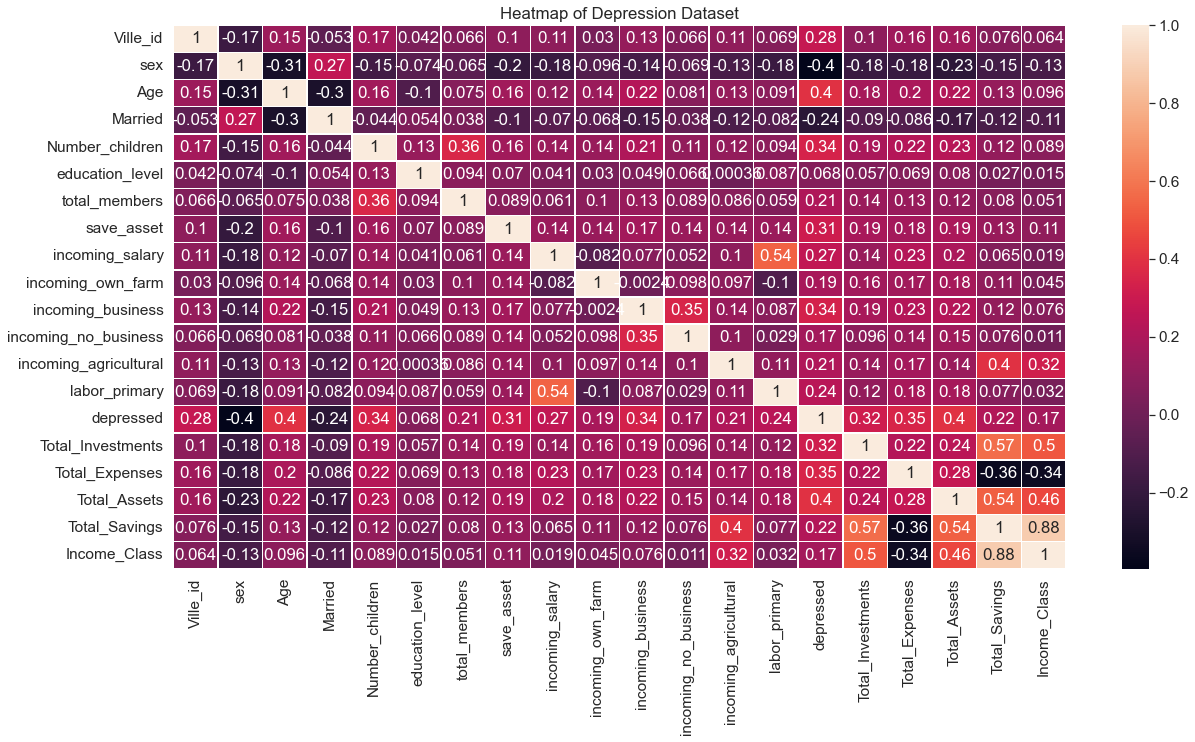

In [119]:
#find the correlation between the features 
new_corr_df = new_df[['Income_Class','Total_Assets','Total_Expenses','Total_Investments','Total_Savings','depressed']]
corr_matrix = new_corr_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5)
plt.title('Heatmap of Depression Dataset')
plt.show()

In [120]:
#set target feature threshold value to 0.02 to retrieve highly correlated features with respect to target feature 
dep_corr = corr_matrix['depressed'].sort_values(ascending = False)
filtered_dep  = dep_corr[dep_corr > 0.02]
filtered_dep

depressed                1.000000
Age                      0.395179
Total_Assets             0.395103
Total_Expenses           0.354535
Number_children          0.343942
incoming_business        0.340061
Total_Investments        0.318080
save_asset               0.311209
Ville_id                 0.282432
incoming_salary          0.266544
labor_primary            0.241157
Total_Savings            0.220072
incoming_agricultural    0.212062
total_members            0.207204
incoming_own_farm        0.187350
Income_Class             0.172771
incoming_no_business     0.166195
education_level          0.068240
Name: depressed, dtype: float64

# Final Model Implementation

In [121]:
X_F = new_df.drop(['depressed','Married','sex'], axis= 1)
Y_F= new_df['depressed']

In [122]:
from sklearn.model_selection import train_test_split
X_F_train, X_F_test, Y_F_train, Y_F_test = train_test_split(X_F,Y_F, test_size = 0.2, random_state = 151)

In [123]:
print(X_F_train.shape)
print(X_F_test.shape)

(1700, 17)
(425, 17)


In [124]:
print(Y_F_train.shape)
print(Y_F_test.shape)

(1700,)
(425,)


In [125]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_F_train = scalar.fit_transform(X_F_train)
X_F_test = scalar.fit_transform(X_F_test)

In [126]:
X_F_test[0:2]

array([[0.07942238, 0.27142857, 0.18181818, 0.33333333, 0.27272727,
        0.16601118, 0.        , 0.        , 1.        , 1.        ,
        0.29100374, 0.        , 0.56762045, 0.30441165, 0.21772588,
        0.50105153, 0.5       ],
       [0.64981949, 0.44285714, 0.45454545, 0.38888889, 0.63636364,
        0.22595701, 1.        , 0.        , 0.        , 0.        ,
        0.18853764, 1.        , 0.2656107 , 0.4430535 , 0.4839719 ,
        0.39892028, 0.        ]])

In [127]:
np.any(np.isnan(new_df))

False

In [128]:
np.all(np.isfinite(new_df))

True

## Model Implementations

Predicted Values : 
[0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0]
--------------------------------------------
Confusion Matrix : 
[[199  28]
 [ 50 148]]
Classification Report : 
----

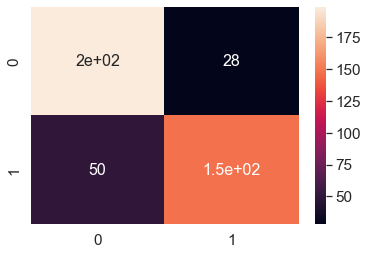

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
lr = LogisticRegression()
lr.fit(X_F_train, Y_F_train)
y_pred = lr.predict(X_F_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_F_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_F_test,y_pred))
print("--------------------------------------------")
LR_acc1 = accuracy_score(Y_F_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot: ")

Predicted Values : 
[1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1]
--------------------------------------------
Confusion Matrix : 
[[ 78 149]
 [154  44]]
Classification Report : 
----

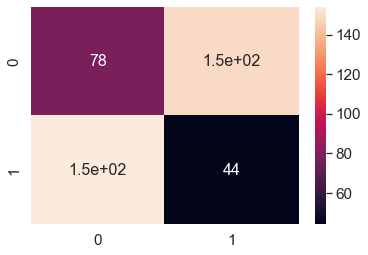

In [132]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_F_train,Y_F_train)
y_pred = svm_classifier.predict(X_F_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_F_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_F_test,y_pred))
print("--------------------------------------------")
SVC_acc1 = accuracy_score(Y_F_test,y_pred)                                 # Accuracy of the model
print("Confusion Matrix plot: ")

Predicted Values : 
[0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0]
--------------------------------------------
Confusion Matrix : 
[[159  68]
 [ 52 146]]
Classification Report : 
----

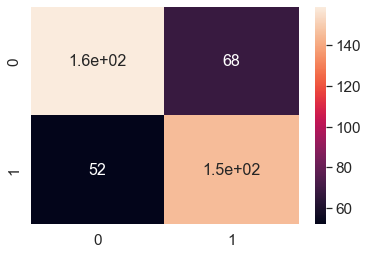

In [134]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state = 151,max_depth=5)
tree_classifier

tree_classifier.fit(X_F_train,Y_F_train)

y_pred = tree_classifier.predict(X_F_test)
print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_F_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_F_test,y_pred))
print("--------------------------------------------")
DTC_acc1 = accuracy_score(Y_F_test,y_pred)                                 # Accuracy of the model

Predicted Values : 
[0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0]
--------------------------------------------
Confusion Matrix : 
[[196  31]
 [ 44 154]]
Classification Report : 
----

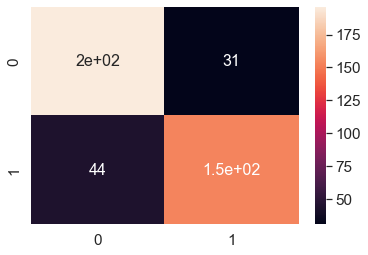

In [136]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=151,n_estimators=100)
rfc.fit(X_F_train,Y_F_train)
y_pred = rfc.predict(X_F_test)

print("Predicted Values : ")  
print(y_pred)
print("--------------------------------------------")
print("Confusion Matrix : ")
cm = confusion_matrix(Y_F_test,y_pred)
print(cm)
conf_matrix_plot(cm) 
print("Classification Report : ")
print("--------------------------------------------")
print(classification_report(Y_F_test,y_pred))
print("--------------------------------------------")
RFC_acc1 = accuracy_score(Y_F_test,y_pred)                                 # Accuracy of the model

In [ ]:
print(" Feature Importances")
showimp(lr, X_F, Y_F)

In [139]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'SVC','Decision Tree Classifier', 'Random Forest Classifier'],'Accuracy' : [round(LR_acc1,2),SVC_acc1,DTC_acc1,RFC_acc1]})
models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
3,Random Forest Classifier,0.823529
0,Logistic Regression,0.820000
2,Decision Tree Classifier,0.717647
1,SVC,0.287059


In [ ]:
print(f"BaseLine Model accuracy score is:{DTC_acc:.4f}")                              # Prints the part1 out_of_bag score as old oob score
print(f"Final Model  accuracy score is:{RFC_acc1:.4f}")                               # Prints the part3 out_of_bag score as new oob score

percent_difference_oob = ((RFC_acc1-DTC_acc)/DTC_acc)*100                                # Calculates the percent difference between old oob score and new oob score
print(f"Difference in percentage is : {percent_difference_accuracy:.4f}%")        # Prints difference in percentage of oob score

In [ ]:
# !pip install scikit-plot

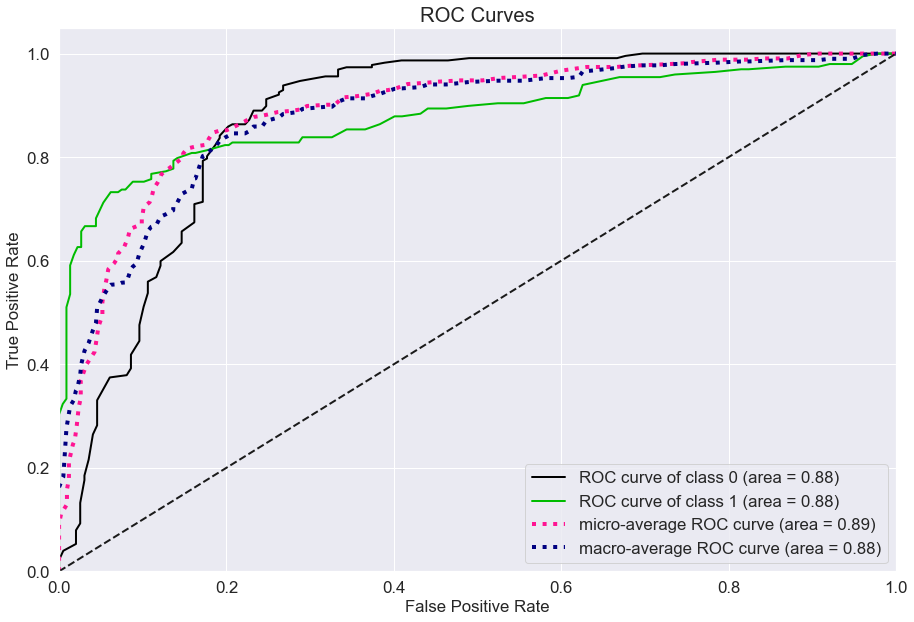

In [152]:
import scikitplot as skplt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

y_true = Y_F_test
y_probas = rfc.predict_proba(X_F_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()  